Matriz de Confusão:
[[2 0]
 [1 0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

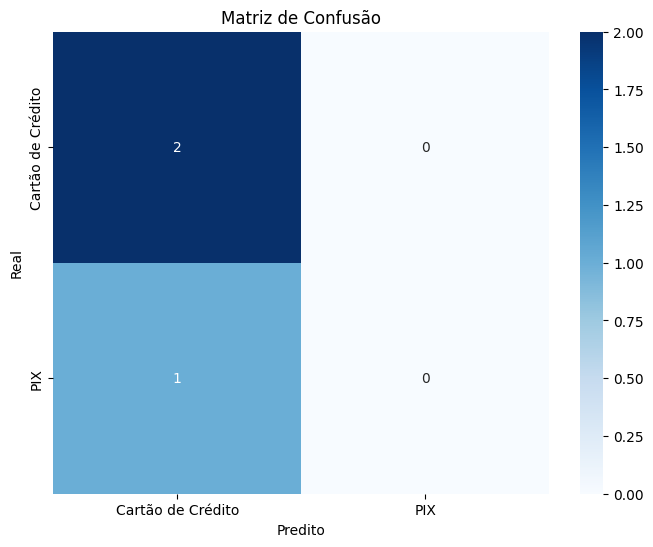

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Criar o DataFrame com os dados fornecidos
data = pd.DataFrame({
    'clientes': ['cliente 2', 'cliente 5', 'cliente 1', 'cliente 1', 'cliente 7', 'cliente 5', 'cliente 7', 'cliente 2', 'cliente 6', 'cliente 7'],
    'Valor_compra': [378, 475, 285, 181, 177, 391, 115, 156, 46, 329],
    'qtde_produtos': [10, 18, 10, 4, 20, 2, 16, 12, 19, 11],
    'forma_pag': [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]  # Forma de pagamento: 1 (PIX), 0 (Cartão de Crédito)
})

# 2. Codificar variáveis categóricas
# Neste caso, não há variáveis categóricas para codificar diretamente
# Forma_pag já está codificada corretamente como 0 e 1

# Separar características e variável alvo
X = data[['Valor_compra', 'qtde_produtos']]
y = data['forma_pag']

# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Treinar o modelo SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Fazer previsões
y_pred = model.predict(X_test_scaled)

# 7. Avaliar o modelo
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 8. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cartão de Crédito', 'PIX'], yticklabels=['Cartão de Crédito', 'PIX'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
